### KNN :  K-Nearest Neighbors Algorithme (algorthme des K plus proches voisins)

L'algorithme KNN (k-nearest neighbors) est un algorithme d'apprentissage automatique supervisé simple et facile à mettre en œuvre, qui peut être utilisé pour résoudre les problèmes de classification et de régression (qu'est ce qu'une régréssion ? une classification ?).  
Un algorithme d'apprentissage automatique supervisé est un algorithme qui s'appuie sur des données d'entrée étiquetées (des couples données-étiquettes).
On dispose donc de données d'apprentissage et lors de la prédiction, lorsqu'on rencontre une nouvelle donnée (de test) à prédire, on cherche les K instances d'entraînement les plus proches de cette nouvelle donnée.  
On attribue ensuite  à cette donnée la classe (étiquette) la plus courante parmi ces K instances d'apprentissage.

On a ainsi besoin d'une fonction mathématique pour mesurer la distance séparant nos objets (données). On supposera que nos données sont des vecteurs de $\mathbb{R}^n$

La **distance de Minkowski** entre deux points $A = (x_1, x_2, \dots, x_n)$ et $B = (y_1, y_2, \dots, y_n) $ dans un espace à $n$ dimensions (pour nous $\mathbb{R}^n$) est définie par :
$$
d_p(A, B) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}, \quad p \geq 1
$$

Cas particuliers :
- Pour $p = 1$, on obtient la **distance de Manhattan** :
  $$ d_1(A, B) = \sum_{i=1}^{n} |x_i - y_i| $$
- Pour $p = 2$, on obtient la **distance Euclidienne** :
$$ d_2(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$
- Pour $p \to \infty$, on obtient la **distance de Chebyshev** (ou $l_\infty$) :
$$ d_{\infty}(A, B) = \max_{1 \leq i \leq n} |x_i - y_i| $$

Quelles propriétés doit vérifier une fonction (espaces de départ et d'arrivée ?) pour être une distance ? Pour $p=1$ vérifiez que ces propriétés sont vérifiées.    
Pour "voir" les différences entre ces distances, au moins pour les trois cas particuliers, on pourra tracer dans $\mathbb{R}^2$ la boule unité correspondante (les points du plan qui sont à une distance inférieure ou égale à 1 de l'origine).  
On pourra également se poser la question du choix de la distance...  
On choisira également $k$ (le nombre de voisins les plus proches à retenir). Là aussi on se posera la question du choix de $k$ et des conséquences (s'il est trop petit, trop grand ?).   
On peut alors mettre en oeuvre l'algorithme en suivant les étapes ci-dessous :


1. Charger les données
2. Pour chaque donnée
   - Calculer la distance entre la donnée en question et l'enregistrement courant.
   - Ajouter la distance et l'indice de l'enregistrement dans une collection.
3. Trier la collection par distances croissantes.
4. Choisir les $k$ premières entrées de la collection
5. Obtenir les étiquettes de ces entrées
6.   - S'il s'agit d'une régression, retourner la valeur moyenne des étiquettes
     - S'il s'agit d'un classification, retourner la valeur la plus courante parmi les étiquettes des $k$ voisins retenus.

On pourra, dans un premier temps, pour tester utiliser comme données d'apprentissage des points de $\mathbb{N}^2$ étiquettés par des lettres de l'alphabet (on pourra se limiter un petit nombre pour les tests, et même les représenter graphiquement).  

On se posera également la question de la normalisation des données (de gros écarts entre les valeurs, par exmple la taille en mètre et le poids en kilogramme).
De même que se passe t-il si nos données sont de grande dimension (que se passe t'il pour la distance des données à notre donnée de test)

Comment apprécier la qualité de notre classification (régréssion) ?

Qu'en est-il de la compléxité de cet algorithme ?

On testera également cet algorithme en utilisant la bibliothèque libre  **Scikit-learn (sklearn)**    destinée à l'apprentissage automatique.  



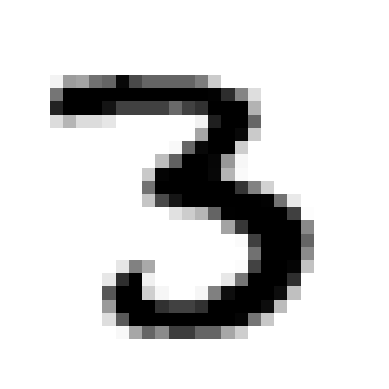

In [16]:
from sklearn.datasets import fetch_openml, load_digits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

# Récupère les images des chiffres et les labels correspondant
mnist = fetch_openml("mnist_784") 
mnist.target = mnist.target.astype(np.int8)

x = np.array(mnist.data)
y = np.array(mnist.target)

# On peut également mélanger le tout pour ne pas tester toujours le même chiffre 
#rd = np.random.permutation(x.shape[0])
#x = x[rd]
#y = y[rd]

nbr = x[12]
# nbr correspond aux pixels de  l'image 28x28 = 784 
nbr_image = nbr.reshape(28, 28)
plt.imshow(nbr_image, cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
# On peut vérifier que le label y[12] correspond bien au nombre affiché

### K-means (K-moyennes)

Étant donnés un ensemble de points et un entier $k$, le problème est de trouver une **partition** (des clusters ou grappes) de ces points en $k$ groupes minimisant la variance à l'intérieur de chaque groupe. Les données sont cette fois non étiquetées.  
Plus précisément, il s'agit de minimiser la somme des carrés des distances de chaque point à la moyenne des points de son groupe.  
On choisira dans un premier temps $k$ au hasard et on se donne un jeu de données (une matrice où chaque ligne représente une donnée).  
Ensuite, Choisir aléatoirement $k$ points,  ces points sont les centres des clusters (appelés aussi centroïd), puis on répète :  
1. Affecter chaque point (ligne de  la matrice de données) au groupe dont il est le plus proche (de son centre).  
2. Recalculer le centre de chaque cluster et modifier le centroide. On prendra simplement la moyenne des points du cluster.

On peut soit déterminer (fixer) à l'avance le nombre d'itération, soit considérer qu'il y a convergence lorsque les centroides n'évoluent plus significativement (on peut également pour éviter les mauvaises surprises mixer les deux conditions).

  

Comme dans le cas de l'algorithme **Knn**, on se posera la question du choix de $k$ (méthode Elbow).

Mettre en oeuvre cet algorithme et le tester en utilisant les **scikit-learn** (comme précédement). On pourra utiliser comme données  les images  correspondant aux entiers (qu'on supposera ici non étiquetées).